In [2]:
!pip install pandas numpy scikit-learn matplotlib seaborn xgboost jupyter

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
# load dataset
data = pd.read_csv('Heart_Disease_Prediction.csv')  
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [6]:
# Check column names and data types
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Quick statistics
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [8]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode target variable 'Heart Disease' (Presence=1, Absence=0)
le = LabelEncoder()
data['Heart Disease'] = le.fit_transform(data['Heart Disease'])

# Create target column for 30-day readmission (simulated based on heart disease)
data['readmitted_30days'] = np.where(data['Heart Disease'] == 1, 1, 0)

In [9]:
X = data.drop(['Heart Disease', 'readmitted_30days'], axis=1)
y = data['readmitted_30days']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# -------------------------------
# Logistic Regression Model
# -------------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Scale features for better convergence
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# Train Logistic Regression
# max_iter increased to ensure convergence
# -------------------------------
lr = LogisticRegression(max_iter=5000, solver='lbfgs', random_state=42)
lr.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = lr.predict(X_test_scaled)

# -------------------------------
# Evaluate model performance
# -------------------------------
print("Logistic Regression Results")
print(classification_report(y_test, y_pred))

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



Random Forest Results
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.78      0.67      0.72        21

    accuracy                           0.80        54
   macro avg       0.79      0.77      0.78        54
weighted avg       0.79      0.80      0.79        54



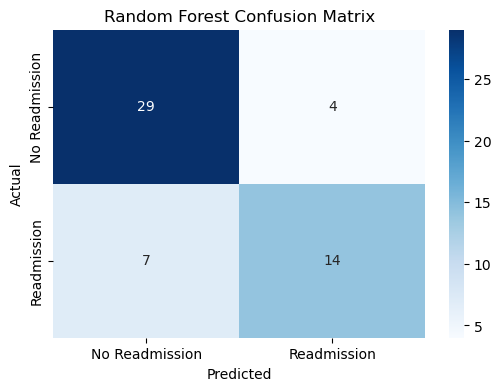

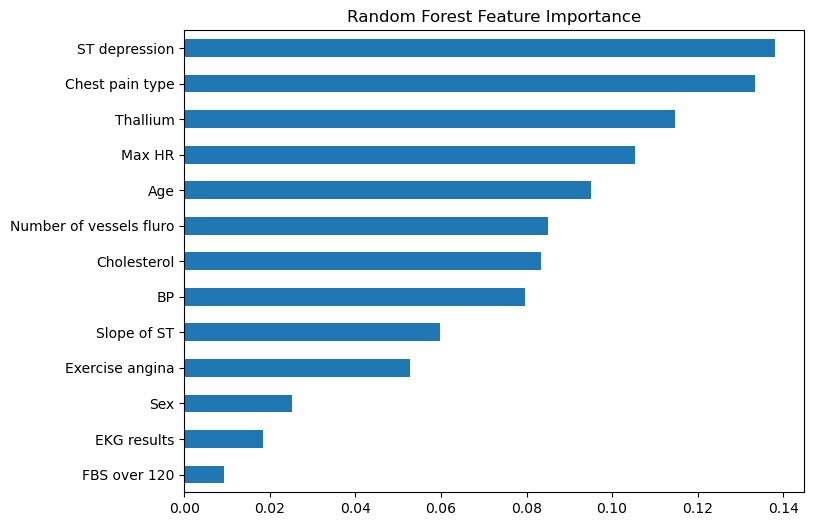

In [16]:
# -------------------------------
# Random Forest Classifier
# -------------------------------

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Train Random Forest
# -------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

# -------------------------------
# Evaluate model performance
# -------------------------------
print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Readmission', 'Readmission'], yticklabels=['No Readmission', 'Readmission'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Random Forest Confusion Matrix')
plt.show()

# -------------------------------
# Feature Importance
# -------------------------------
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(8,6))
feat_importances.sort_values().plot(kind='barh')
plt.title("Random Forest Feature Importance")
plt.show()

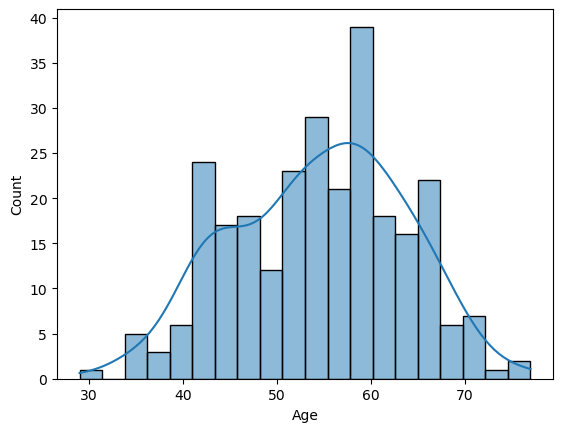

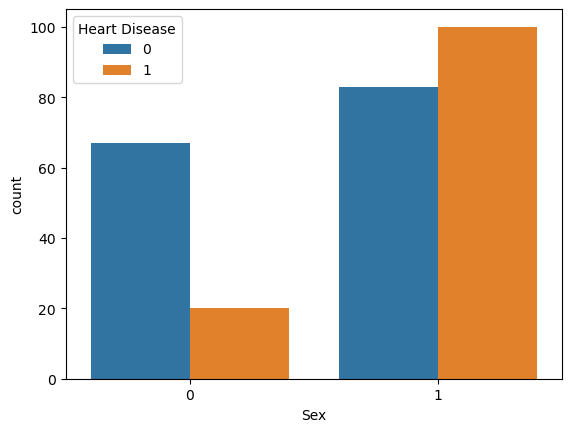

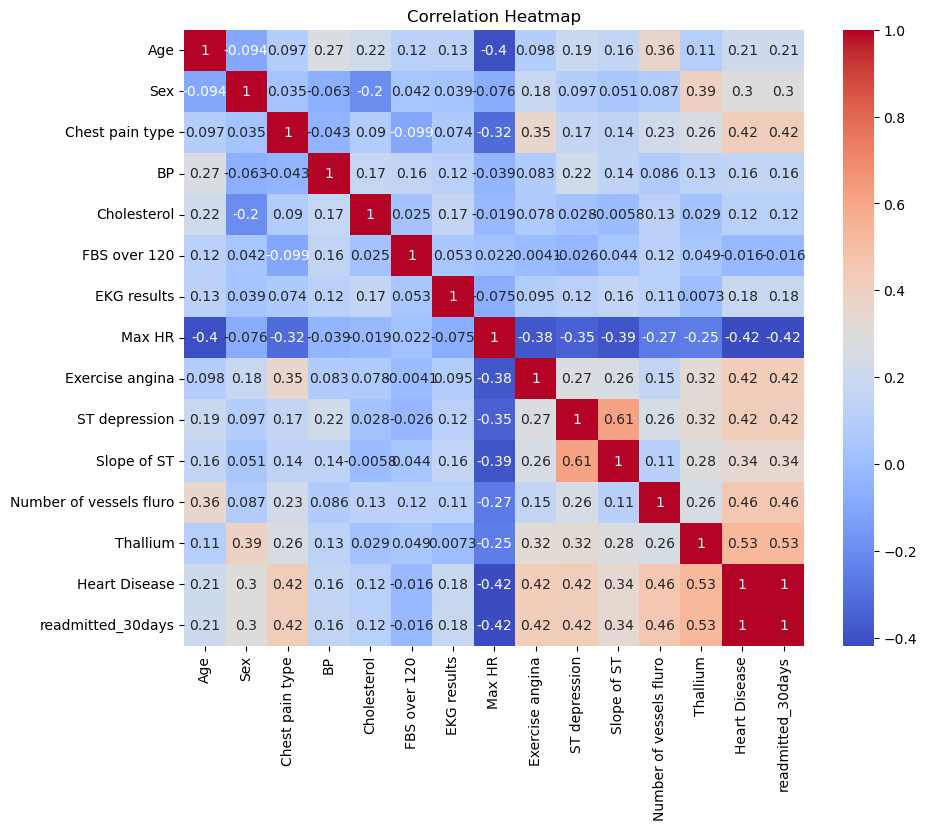

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Age'], kde=True, bins=20)
plt.show()

sns.countplot(x='Sex', hue='Heart Disease', data=data)
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

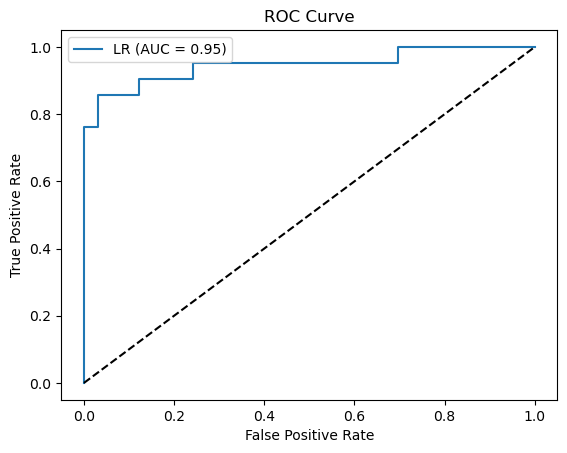

In [19]:
from sklearn.metrics import roc_curve, auc

y_prob = lr.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='LR (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

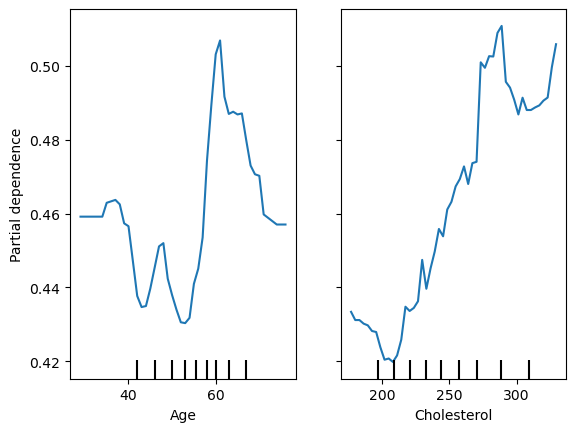

In [22]:
# -------------------------------
# Partial Dependence Plot (updated for scikit-learn >= 1.2)
# -------------------------------

from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Example: show effect of 'Age' and 'Cholesterol' on Random Forest predictions
features = ['Age', 'Cholesterol']

PartialDependenceDisplay.from_estimator(rf, X_train, features=features, grid_resolution=50, kind='average')
plt.show()

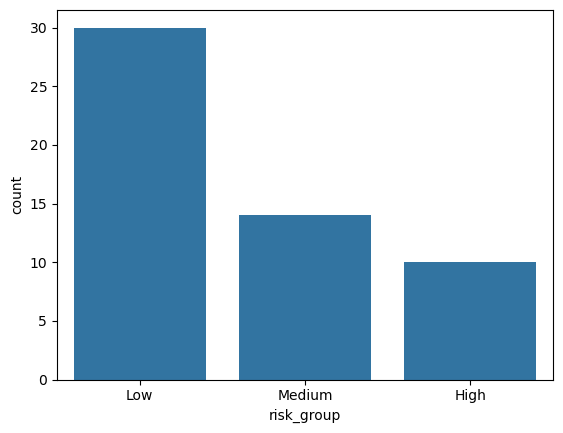

In [21]:
y_prob = lr.predict_proba(X_test_scaled)[:,1]
data_test = X_test.copy()
data_test['prob_readmission'] = y_prob
data_test['risk_group'] = pd.cut(data_test['prob_readmission'], bins=[0,0.3,0.7,1], labels=['Low','Medium','High'])
sns.countplot(x='risk_group', data=data_test)
plt.show()

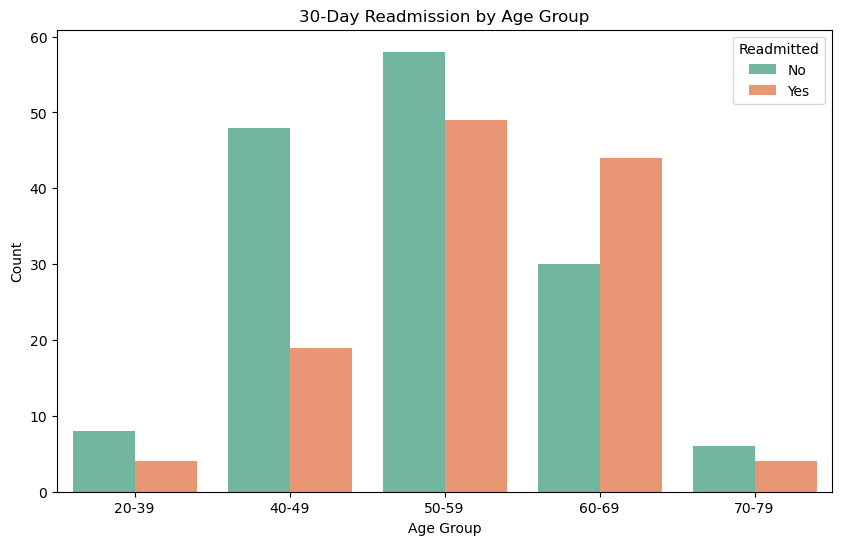

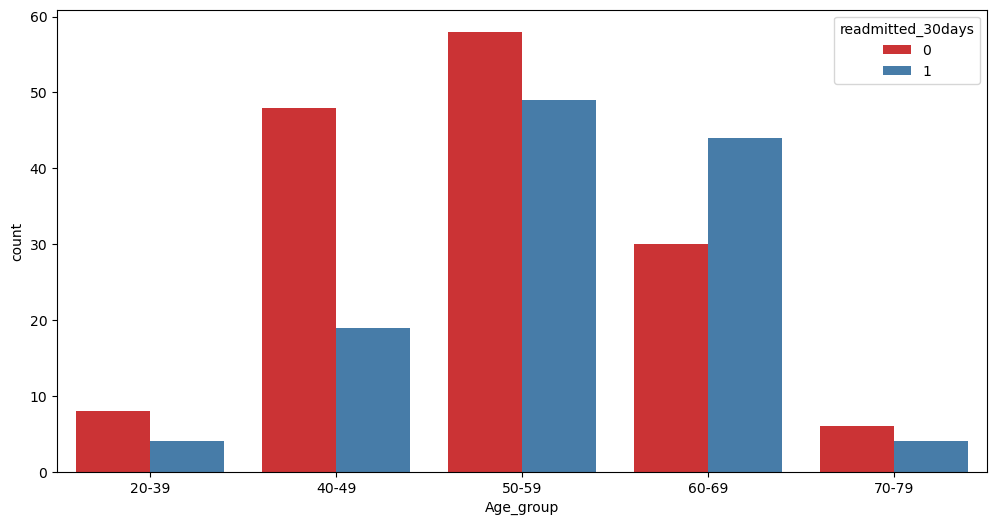

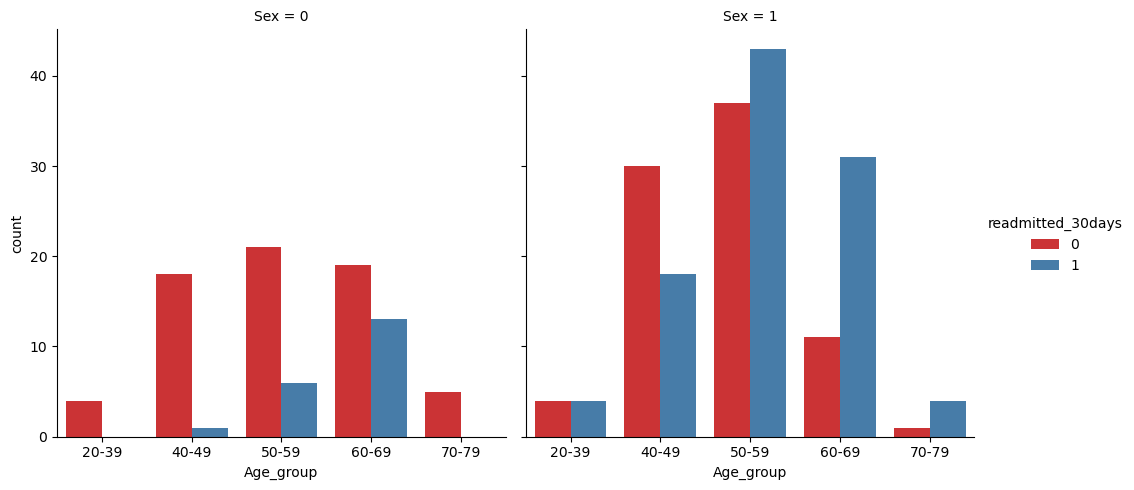

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -------------------------------
# Add age groups for better visualization
# -------------------------------
bins = [20, 40, 50, 60, 70, 80]  # adjust bins according to your data range
labels = ['20-39','40-49','50-59','60-69','70-79']
data['Age_group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# -------------------------------
# Plot readmission counts by Sex and Age group
# -------------------------------
plt.figure(figsize=(10,6))
sns.countplot(x='Age_group', hue='readmitted_30days', data=data, palette='Set2')
plt.title("30-Day Readmission by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title='Readmitted', labels=['No', 'Yes'])
plt.show()

# -------------------------------
# Optional: split further by Sex
# -------------------------------
plt.figure(figsize=(12,6))
sns.countplot(x='Age_group', hue='readmitted_30days', data=data, palette='Set1', hue_order=[0,1])
sns.catplot(x='Age_group', hue='readmitted_30days', col='Sex', kind='count', data=data, palette='Set1')
plt.show()

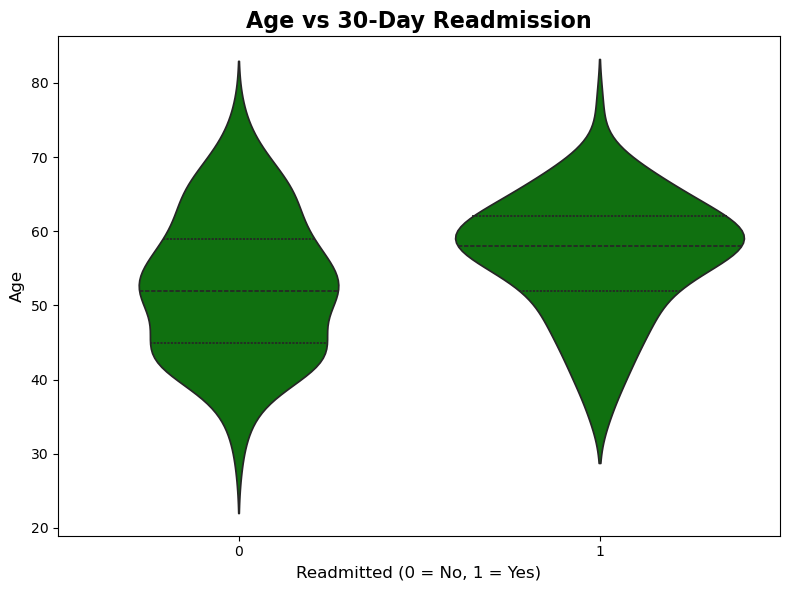

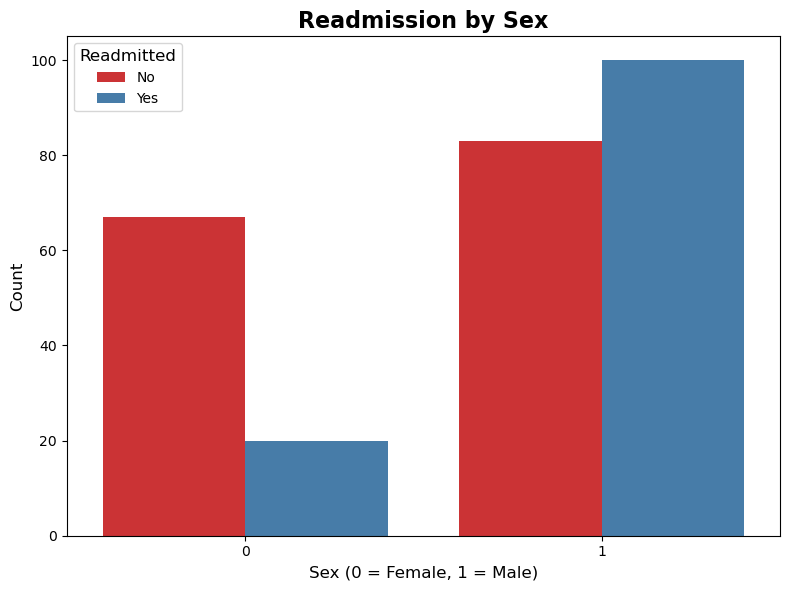

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Age vs 30-Day Readmission
# -------------------------------
plt.figure(figsize=(8, 6))
sns.violinplot(
    x='readmitted_30days',
    y='Age',
    data=data,
    color='green',  # changed color
    inner='quartile'
)
plt.title("Age vs 30-Day Readmission", fontsize=16, weight='bold')
plt.xlabel("Readmitted (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# -------------------------------
# Readmission by Sex
# -------------------------------
plt.figure(figsize=(8, 6))
sns.countplot(
    x='Sex',
    hue='readmitted_30days',
    data=data,
    palette='Set1'
)
plt.title("Readmission by Sex", fontsize=16, weight='bold')
plt.xlabel("Sex (0 = Female, 1 = Male)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Readmitted', labels=['No', 'Yes'], fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

In [39]:
pip install streamlit plotly seaborn pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [41]:
!pip install shap

   ---------------------------------------- 0.0/549.3 kB ? eta -:--:--
   ---------------------------------------- 549.3/549.3 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/15.6 MB 4.2 MB/s eta 0:00:04
   --- ------------------------------------ 1.3/15.6 MB 3.4 MB/s eta 0:00:05
   ------ --------------------------------- 2.4/15.6 MB 3.8 MB/s eta 0:00:04
   -------- ------------------------------- 3.1/15.6 MB 4.0 MB/s eta 0:00:04
   ---------- ----------------------------- 3.9/15.6 MB 3.7 MB/s eta 0:00:04
   ------------ --------------------------- 5.0/15.6 MB 3.8 MB/s eta 0:00:03
   -------------- ------------------------- 5.8/15.6 MB 3.7 MB/s eta 0:00:03
   ---------------- ----------------------- 6.6/15.6 MB 3.7 MB/s eta 0:00:03
   ------------------ --------------------- 7.1/15.6 MB 3.6 MB/s eta 0:00:03
   -------------------- ------------------- 7.9/15.6 MB 3.7 MB/s eta 0:00:03
   ------

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.0.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
